# Imgup Demo: Uptools

Hello! Welcome to Imgup, a simple library that makes image data processing quick and easy. Imgup is primarily geared towards image classification but can be applied to many other types of projects.

This is a quickstart demonstration of the library's basic functionality. The demo is split into two parts:

- Processing image datasets using Imgup's **uptools** module
- Augmenting image data using Imgup's **augtools** module (see the notebook `augtools_demo.ipynb`)

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Processing Image Datasets with Uptools

Uptools helps to streamline various image data preprocessing tasks, such as:

 - Reading images from a local disk
 - Rescaling images
 - Normalizing and standardizing pixel values
 - Converting image datasets into numpy-arrays
 - One-hot-encoding label data
 - Splitting image datasets into training, validation, and testing subsets
 - Saving numpy-arrays as images in class subdirectories

To begin, ensure Imgup is installed by running `pip install imgup`. From Imgup, we can then import Uptools:

In [2]:
# importing uptools
from imgup import uptools

The key to most of Uptools' functionality is the `Image_Dataset` class which represents image datasets. The class comes with several attributes and methods that can be used to complete a variety of image processing tasks in a single line of code.

### Reading Image Data from Disk

Included in the same folder as this demo are a few collections of images. We will be using these for demonstration purposes. `array_data/` contains data in the form of X-(images) and y-(labels) numpy-arrays, `imgs_a/` contains raw images organized into subdirectories by class, and `imgs_b/` contains unorganized raw images.

For the most simple case, let us create an image dataset from the images from `imgs_a`. We can do this by creating an instance of the `Image_Dataset` class and passing the base path of the images as an argument:

In [3]:
my_dataset = uptools.Image_Dataset("demo_img_data/imgs_a")

Processing data: 100%|██████████| 15/15 [00:00<00:00, 58.62it/s]

Image_Dataset initialized.


The object we have just created is an image dataset composed of `X_data` (image) and `y_data` (one-hot-encoded label) arrays. We can access these two arrays by calling either the `X_data` and `y_data` attributes of `my_dataset`:

```
X_data = my_dataset.X_data
y_data = my_dataset.y_data
```

Or by using the `generate` method:

In [4]:
X_data, y_data = my_dataset.generate()

We can investigate the contents of these arrays manually, or we can get some summary information using the following methods:

In [5]:
# total number of images
my_dataset.size

15

In [6]:
# number of distinct classes
my_dataset.class_no

3

In [7]:
# list of distinct classes
my_dataset.class_list

['boat', 'car', 'helicopter']

Or, we can use the `details` method to print some information:

In [8]:
# general summary info
my_dataset.details()

Image_Dataset details
---------------------
total_images: 15
images_per_class: {'boat': 5, 'car': 5, 'helicopter': 5}
image_size: various
pixel_values: {'min': 0, 'max': 255}


Or even to get a pretty visualization:

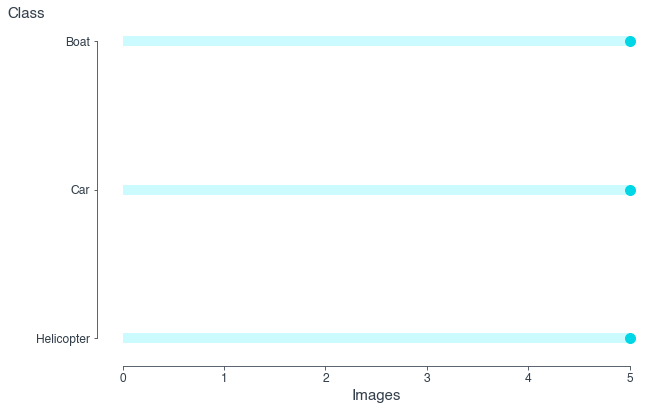

In [9]:
# pretty visualization of general summary info
my_dataset.details(plot=True)

We can also get a full list of `y_data` labels:

In [10]:
my_dataset.labels

['boat',
 'boat',
 'boat',
 'boat',
 'boat',
 'car',
 'car',
 'car',
 'car',
 'car',
 'helicopter',
 'helicopter',
 'helicopter',
 'helicopter',
 'helicopter']

The `y_data` array is itself, however, automatically one-hot-encoded, as we can see:

In [11]:
print("y_data position\t\ty_data\t\tlabel")
print("---------------\t\t------\t\t-----")
for i in range(1,15,3):
    print(f"y_data[{i}]\t\t{my_dataset.y_data[i]}\t{my_dataset.labels[i]}")

y_data position		y_data		label
---------------		------		-----
y_data[1]		[1. 0. 0.]	boat
y_data[4]		[1. 0. 0.]	boat
y_data[7]		[0. 1. 0.]	car
y_data[10]		[0. 0. 1.]	helicopter
y_data[13]		[0. 0. 1.]	helicopter


Also, we can display random batches of images from `X_data` using the `display_batch` method (passing the number of rows and columns to display as arguments):

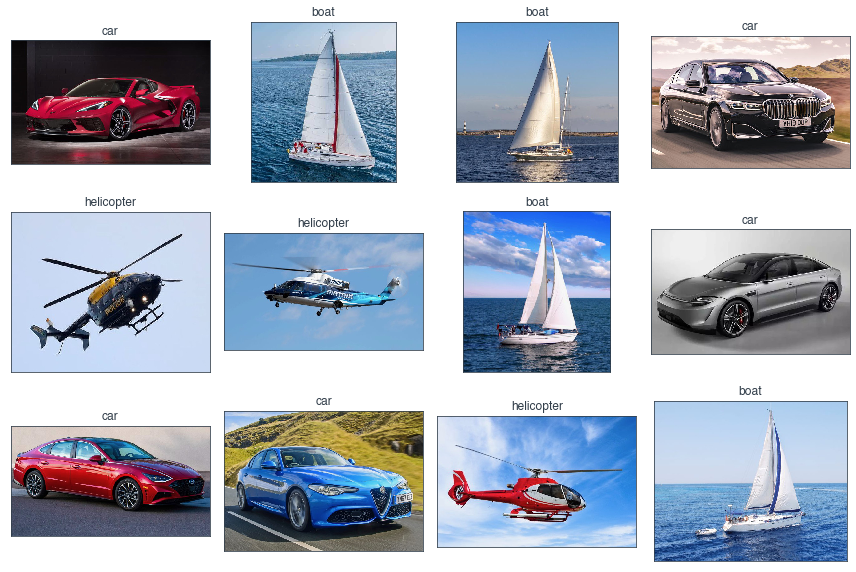

In [12]:
my_dataset.display_batch(3,4)

### Processing Images

Because the primary aim of Uptools is to facilitate the preprocessing stage of comupter vision projects, it is likely that image data contained in an `Image_Dataset` object will need to be rescaled and/or normalized. This can be done when initializing the `Image_Dataset` object by passing rescale values to the keyword argument `resize` and `True` to the keyword argument `normalize`, like so:

In [13]:
my_dataset_2 = uptools.Image_Dataset("demo_img_data/imgs_a",
                                     resize=[220,220],
                                     normalize=True)

Processing data: 100%|██████████| 15/15 [00:00<00:00, 82.84it/s]

Normalizing...
Image_Dataset initialized.


In [14]:
my_dataset_2.details()

Image_Dataset details
---------------------
total_images: 15
images_per_class: {'boat': 5, 'car': 5, 'helicopter': 5}
image_size: [220, 220]
pixel_values: {'min': 0.0, 'max': 1.0}


We see that for `my_dataset_2` the image size is now 220x220 pixels and the pixel values range from 0 to 1 (compare this to `my_dataset_1` above).

It is also likely that we will need to split the dataset into training, validation, and/or testing subsets. We can do this simply by calling the `tvt_split` method on the `Image_Dataset` object, and passing as arguments the ratios for each subset. If three numbers are given, the dataset will be split into training, validation, and testing subsets. If only two are given, the dataset will be split into training and testing sets only.

In [15]:
my_dataset_2.tvt_split([0.6,0.2,0.2])

X_train shape: (9, 220, 220, 3)
y_train shape: (9, 3)
X_val shape: (3, 220, 220, 3)
y_val shape: (3, 3)
X_test shape: (3, 220, 220, 3)
y_test shape: (3, 3)


The `tvt_split` method creates and sets an attribute for each of the subsets, so `X_train` can be accessed by calling `my_dataset_2.X_train`, and so on. The method also has in-built random seed setting and subset stratification to preserve class distributions. These can be implemented by passing the `seed` and `stratify` keyword arguments, respectively. Additionally, the data in `X_val` and `X_test` can be standardized to the mean and standard deviation of the `X_train` subset using the keyword argument `standardize`.

Furthermore, the data in `X_val` and `X_test` can be standardized to the mean and standard deviation of the `X_train` subset using the keyword argument `standardize`.

### Saving and Loading Image Datasets

Once the `Image_Dataset` object has been initialized, it can be saved to disk for later use. There are two possibilities for saving: either in numpy-array form, or as .jpg images in a main directory (with subdirectories for each class).

**Saving as numpy-arrays:**

To save the data in numpy-array form, we can use the method `save_as_np`. A number of options are available when saving in this way: the path to the save directory is given by the `save_path` argument, and the file format (either **.npy** or **.npz**) is given by the `save_mode` argument. If the dataset has been split using the `tvt_split` method, we can choose to save the subsets separately by specifying `save_split=True`.

The method will check for a directory given as the `save_path` argument. If it exists, it will save the arrays in subdirectories named for the subsets if the data has been split (if split three-ways, the validation data is saved in the same folder as the training training data). If the directory does not exist, it will be created by the method. If the folders are not empty (ie if the data has already been saved), the data will not be overwritten unless the argument `overwrite=True` is given.

In [16]:
my_dataset_2.save_as_np("my_dataset_2_arrays_non_split","npz")

X_data.npz saved in my_dataset_2_arrays_non_split/
y_data.npz saved in my_dataset_2_arrays_non_split/


In [17]:
my_dataset_2.save_as_np("my_dataset_2_arrays_split","npz",save_split=True)

X_train.npz saved in my_dataset_2_arrays_split/train_data/
X_val.npz saved in my_dataset_2_arrays_split/train_data/
y_train.npz saved in my_dataset_2_arrays_split/train_data/
y_val.npz saved in my_dataset_2_arrays_split/train_data/
X_test.npz saved in my_dataset_2_arrays_split/test_data/
y_test.npz saved in my_dataset_2_arrays_split/test_data/


**Saving as images in folders organized by class:**

To save the data in image form, we can use the `save_as_imgdirs` method. Like the `save_as_np` method, this method will create a directory given by the `save_path` argument (unless it already exists). Within this directory, a subdirectory called `ds_images` will be created. Within this subdirectory, a subdirectory will be created for each class and the images belonging to that class will be saved therein. Images can be overwritten by specifying `overwrite=True`. 

In [18]:
my_dataset_2.save_as_imgdirs("my_dataset_2_images")

100%|██████████| 5/5 [00:00<00:00, 140.43it/s]

Images saved in my_dataset_2_images/ds_images/


**Loading Image Datasets**

Datasets that have been saved to disk (in either numpy or image form) can be loaded simply by initializing a new `Image_Dataset` object.

If the data is in image form, we create a new image dataset in the same way we created it above:

In [19]:
my_dataset_3 = uptools.Image_Dataset("my_dataset_2_images/ds_images",normalize=True)

Processing data: 100%|██████████| 15/15 [00:00<00:00, 152.16it/s]


Normalizing...
Image_Dataset initialized.


In [20]:
my_dataset_3.details()

Image_Dataset details
---------------------
total_images: 15
images_per_class: {'boat': 5, 'car': 5, 'helicopter': 5}
image_size: various
pixel_values: {'min': 0.0, 'max': 1.0}


If the data is in numpy form, we can load it by initializing a new `Image_Dataset` and passing some additional arguments.

In [21]:
my_dataset_4 = uptools.Image_Dataset("demo_img_data/array_data",
                                     resize=[220,220],
                                     normalize=True,                                     
                                     from_np=("X_data.npz","y_data.npz"),
                                     np_classes=["panda","horse","duck","squirrel"],
                                     np_prenorm=True)

Processing data: 100%|██████████| 24/24 [00:00<00:00, 603.24it/s]


Normalizing...
Image_Dataset initialized.


In [22]:
my_dataset_4.details()

Image_Dataset details
---------------------
total_images: 24
images_per_class: {'duck': 6, 'horse': 6, 'panda': 6, 'squirrel': 6}
image_size: [220, 220]
pixel_values: {'min': 0.0, 'max': 1.0}


**Caution:** the `np_classes` argument assumes that the label data has been one-hot-encoded in alphabetical order. The class list given by `np_classes` is sorted alphabetically when the `Image_Dataset` object is initialized, so it can itself be given in any order.

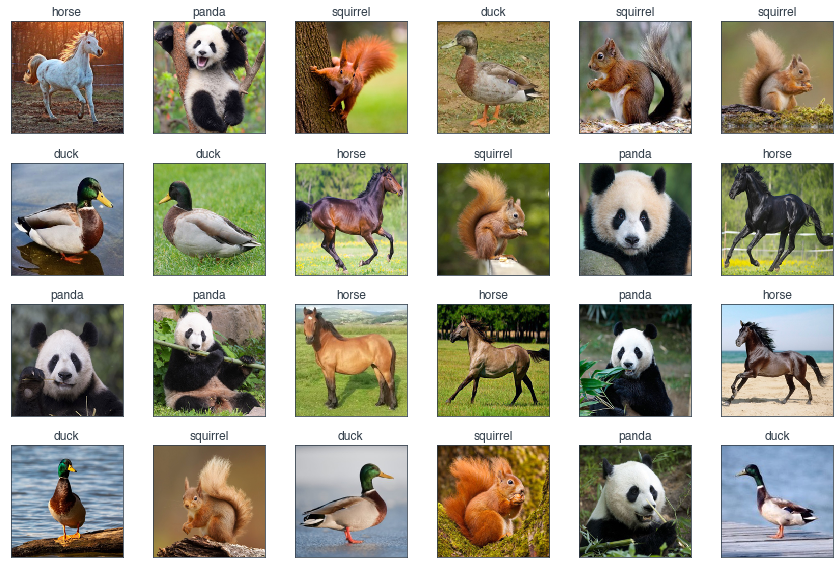

In [23]:
my_dataset_4.display_batch(4,6)

The new dataset can then be saved to disk in either numpy or image form, using `save_as_numpy` or `save_as_imgdirs`, respectively.

### Converting Unlabelled Images to Class Subdirectories (With List of Labels)

There might be a case in which we have a collection of images that are not labelled, but for which we have a list of labels prepared (for example an Excel spreadsheet, or simply a list of labels that correspond with the images). Using Imgup Uptools, we can turn this collection into an `Image_Dataset` object, tied in with the list of labels, and save them to disk in either numpy form or as images in class subdirectories. To do this, we will make use of some of Imgup Uptools' module-wide functions.

First, we can generate a Pandas DataFrame from the directory in which the images are stored using the `img_to_df` function:

In [24]:
df = uptools.img_to_df('demo_img_data/imgs_b')

We can then use `display_img_df` to have display the images in order. The images will be displayed in batches, with the first argument specifying which batch to display, the second specifying the number of batches to display, and the last two being the number of rows and columns of images to display in the batch, respectively. 

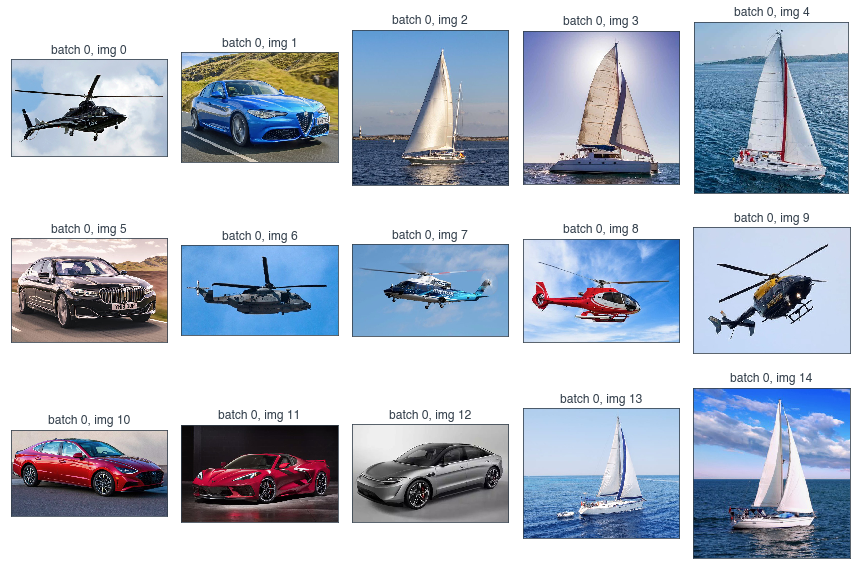

In [25]:
uptools.display_img_df(df,0,15,3,5)

We can then use the `read_img_df` function to read and process the images in the DataFrame. We can also save these images to disk by passing `save=True` as an argument. This will create a new folder (if it does not already exist) called `preprocessing`, and the images will be saved in numpy-array form in a subdirectory within this folder called `read_img_df`.

In [26]:
unlabelled_x_array = uptools.read_img_df(df,save=True)

Now suppose we have obtained a list of labels corresponding to each image, like so:

In [27]:
labels_for_ids_4 = ['heli',
                    'car',
                    'boat',
                    'boat',
                    'boat',
                    'car',
                    'heli',
                    'heli',
                    'heli',
                    'heli',
                    'car',
                    'car',
                    'car',
                    'boat',
                    'boat']

And so we can obtain a list of unique classes:

In [28]:
classes_for_newly_labelled_dataset = list(set(labels_for_ids_4))
classes_for_newly_labelled_dataset

['heli', 'car', 'boat']

We can then use the `one_hot_encode` function to one-hot encode the list of labels:

In [29]:
ohe_y_data = uptools.one_hot_encode(labels_for_ids_4,classes_for_newly_labelled_dataset,save=True)

Again, we can save the resulting one-hot encoded array as the `y_data` by passing the `save=True` argument. This will save in the `preprocessing` folder in another subdirectory called `one_hot_encoding`. 

We now have our `X_data` and our `y_data` saved to disk in numpy-array form, and so we can create a new `Image_Dataset` object using the numpy-related arguments:

In [30]:
newly_labelled_dataset = uptools.Image_Dataset('preprocessing',
                                               from_np=('read_img_df/X_data_1.npz','one_hot_encoding/y_data_1.npz'),
                                               np_classes=classes_for_newly_labelled_dataset)

Processing data: 100%|██████████| 15/15 [00:00<00:00, 663.42it/s]

Image_Dataset initialized.


In [31]:
newly_labelled_dataset.details()

Image_Dataset details
---------------------
total_images: 15
images_per_class: {'boat': 5, 'car': 5, 'heli': 5}
image_size: various
pixel_values: {'min': 0, 'max': 255}


Now we can just save our `newly_labelled_dataset` to disk in image form!

In [32]:
newly_labelled_dataset.save_as_imgdirs('newly_labelled_dataset')

100%|██████████| 5/5 [00:00<00:00, 91.44it/s]

Images saved in newly_labelled_dataset/ds_images/


And there we have it!

### Additional Utilities

Furthermore to the processes outlined above, the `uptools` module contains the following stand-alone functions that can be used to streamline data processing for image classification tasks:

- `get_class_names`: Fetches class names from subdirectories in the directory given as the base path.
- `img_to_df`: Fetches images and class names from subdirectories in the directory given as the base path and returns a DataFrame.
- `display_img_df`: Displays images contained in an x-by-2 DataFrame (where column 0 is the image path, column 1 is the class name, and x is the number of images).
- `read_img_df`: Reads images contained in an x-by-2 DataFrame (where column 0 is the image path, column 1 is the class name, and x is the number of images).
- `one_hot_encode`: One-hot encodes list of class labels.

The `Image_Dataset` class also includes the `augment_training_set` which calls on an (initialized) `imgup.augtools` augmenter to apply image augmentation to the `Image_Dataset`'s `X_train` subset. This method will be demonstrated in the `augtools` module demo.

## Volià!

For more information on **uptools**, please see the README located in the GitHub repo. Happy machine learning!